In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing EDA and Plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plots will appear inside notebooks
%matplotlib inline

# Importing Machine Learning Models from SciKit Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Evaluation Libraries
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/zomato_pune.xlsx")
df.shape


(12189, 104)

In [ ]:

df.head(10)

,Restaurant_Name,Web_Link,Locality,Sponsored,Ratings_out_of_5,Number of votes,Phone_number,Cuisines,Charges_for_two,payment_modes,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
0,AB's - Absolute Barbecues,https://www.zomato.com/pune/abs-absolute-barbe...,Hinjawadi,Casual Dining,4.9,7029 votes,+91 9373112211,"Continental, North Indian, Chinese","₹1,400",Cash and Cards accepted,...,1,0,0,0,0,0,0,0,0,1539
1,Cafe Co2 Resto Lounge,https://www.zomato.com/pune/cafe-co2-resto-lou...,Bhugaon,"Lounge, Casual Dining",4.6,2578 votes,080 46971866,"North Indian, Chinese, Continental, Kebab, Sea...","₹1,500",Cash and Cards accepted,...,1,0,0,0,0,0,0,0,0,139
2,Paasha - JW Marriott Pune,https://www.zomato.com/pune/paasha-jw-marriott...,Senapati Bapat Road,Fine Dining,4.6,3291 votes,080 46971369,"North Indian, Kebab, Biryani","₹2,500","Cash,Cards and Digital Payments accepted",...,1,0,0,0,0,0,0,0,0,119
3,I Amsterdam,https://www.zomato.com/pune/i-amsterdam-hinjawadi,Hinjawadi,"Casual Dining, Bar",4.3,430 votes,+91 8669698666 +91 8669697666,"Asian, European, Modern Indian, Italian","₹1,400","Cash,Cards and Digital Payments accepted",...,1,0,0,0,0,0,0,0,0,8
4,FC Road Social,https://www.zomato.com/pune/fc-road-social-shi...,Shivaji Nagar,"Bar, Casual Dining",4.5,2138 votes,+91 9172378889 020 29805112,"North Indian, Chinese, Biryani, American, Cont...","₹1,500","Cash,Cards and Digital Payments accepted",...,0,0,0,1,0,0,0,0,0,132
5,Flechazo,https://www.zomato.com/pune/flechazo-wakad,Wakad,"Bar, Casual Dining",4.6,4731 votes,+91 8095311112,"Asian, Mediterranean, North Indian","₹1,400",Cash and Cards accepted,...,1,0,0,0,1,0,0,0,0,597
6,Barbeque Nation - Sayaji Hotel,https://www.zomato.com/pune/barbeque-nation-sa...,Wakad,Casual Dining,4.5,2999 votes,18001086060,"North Indian, Mughlai, Salad, Kebab, BBQ","₹1,700",Cash and Cards accepted,...,1,0,0,0,0,0,0,0,0,192
7,BeHive,https://www.zomato.com/pune/behive-hinjawadi,Hinjawadi,"Pub, Casual Dining",4,1437 votes,+91 9150018777 +91 9175680461,"North Indian, Chinese, Continental","₹1,400",Cash and Cards accepted,...,0,0,0,0,0,0,0,0,0,72
8,Kayani Bakery,https://www.zomato.com/pune/kayani-bakery-east...,East Street,Bakery,4.7,2296 votes,020 26360517,Bakery,₹150,Cash only,...,0,0,0,0,0,0,0,1,0,53
9,Exotica,https://www.zomato.com/pune/exotica-yerawada,Yerawada,Casual Dining,4.2,3758 votes,+91 7276307788 +91 7276305566,"North Indian, Chinese, Mediterranean, Continental","₹1,400",Cash and Cards accepted,...,1,0,0,0,0,0,0,0,0,146


In [ ]:
# Understanding Data types of each column
df.info()

df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12189 entries, 0 to 12188
Columns: 104 entries, Restaurant_Name to spam_review
dtypes: float64(5), int64(87), object(12)
memory usage: 9.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12189 entries, 0 to 12188
Data columns (total 104 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    Restaurant_Name                 12189 non-null  object 
 1    Web_Link                        12189 non-null  object 
 2    Locality                        12189 non-null  object 
 3    Sponsored                       12189 non-null  object 
 4    Ratings_out_of_5                12189 non-null  object 
 5    Number of votes                 12189 non-null  object 
 6    Phone_number                    12189 non-null  object 
 7    Cuisines                        12189 non-null  object 
 8    Charges_for_two                 12189 non-null  object 
 9    payment_m

<ipython-input-7-48e7b3afa8f5>:4: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


In [ ]:
# Looking at values of each Category
df["Locality"].value_counts()

Hadapsar             575
Kothrud              560
Wakad                523
Hinjawadi            481
Sinhgad Road         458
                    ... 
Around Pune            3
Expressway             2
Camp-MG Road Area      2
Talawade               1
Bopkhel                1
Name: Locality, Length: 99, dtype: int64

In [ ]:
# Finding Missing values
df.isna().sum()

Restaurant_Name      0
Web_Link             0
Locality             0
Sponsored            0
Ratings_out_of_5     0
                    ..
Disabled Friendly    0
Serves Halal         0
Takeaway Only        0
BYOB Only            0
spam_review          0
Length: 104, dtype: int64

In [ ]:
# Getting descriptive stats for the dataset
df.describe()

,5_star_review_percentage,4_star_review_percentage,3_star_review_percentage,2_star_review_percentage,1_star_review_percentage,Wine and Beer,Dance Floor,Lunch Menu,Outdoor Seating,Seaside,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
count,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,...,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000
mean,0.359747,0.124092,0.052807,0.024583,0.069750,0.000246,0.005005,0.001559,0.322504,0.000164,...,0.048486,0.002543,0.001887,0.247846,0.005743,0.001641,0.000574,0.029863,0.000164,4.943966
std,0.334197,0.148092,0.080175,0.045164,0.104451,0.015687,0.070568,0.039452,0.467454,0.012809,...,0.214800,0.050369,0.043400,0.431780,0.075567,0.040475,0.023958,0.170216,0.012809,28.865265
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.360000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.620000,0.230000,0.090000,0.040000,0.110000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,0.710000,0.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1539.000000


In [ ]:
corr_matrix = df.corr()
corr_matrix

<ipython-input-11-208d05607fc1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,5_star_review_percentage,4_star_review_percentage,3_star_review_percentage,2_star_review_percentage,1_star_review_percentage,Wine and Beer,Dance Floor,Lunch Menu,Outdoor Seating,Seaside,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
5_star_review_percentage,1.000000,0.225784,0.085345,0.100174,0.174882,0.003298,0.030008,0.004075,0.045122,-0.001332,...,0.084715,0.028504,-0.013940,-0.026944,0.008732,0.022777,0.012007,-0.054503,0.000201,0.078370
4_star_review_percentage,0.225784,1.000000,0.545361,0.325119,0.261234,0.030646,0.058100,0.012530,0.252775,0.036844,...,0.205831,0.034353,-0.002478,0.039966,0.032799,0.025571,-0.002281,-0.038081,0.012190,0.160676
3_star_review_percentage,0.085345,0.545361,1.000000,0.408517,0.336642,0.010541,0.027681,0.006658,0.229928,-0.006840,...,0.102866,0.017127,-0.006946,0.042878,0.031602,0.013751,-0.002548,-0.055562,0.012335,0.077195
2_star_review_percentage,0.100174,0.325119,0.408517,1.000000,0.395694,-0.002750,0.028586,0.006121,0.145443,-0.006973,...,0.078582,0.011106,-0.005668,0.012518,0.016569,0.011146,-0.001674,-0.047580,0.018556,0.062631
1_star_review_percentage,0.174882,0.261234,0.336642,0.395694,1.000000,-0.005471,0.016310,0.001488,0.104158,0.005550,...,0.030308,0.004956,-0.007679,-0.007303,0.006731,-0.000679,0.019402,-0.066864,0.009843,0.040273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Disabled Friendly,0.022777,0.025571,0.013751,0.011146,-0.000679,-0.000636,0.054576,-0.001602,0.045749,-0.000519,...,0.104094,-0.002047,-0.001763,0.000202,0.023744,1.000000,-0.000972,-0.007113,-0.000519,0.083016
Serves Halal,0.012007,-0.002281,-0.002548,-0.001674,0.019402,-0.000376,-0.001700,-0.000947,-0.001887,-0.000307,...,-0.005411,-0.001210,-0.001042,0.002102,-0.001822,-0.000972,1.000000,-0.004206,-0.000307,-0.003869
Takeaway Only,-0.054503,-0.038081,-0.055562,-0.047580,-0.066864,-0.002753,-0.012443,-0.006932,-0.121050,-0.002248,...,-0.037361,-0.008859,-0.007629,-0.011405,0.005802,-0.007113,-0.004206,1.000000,-0.002248,-0.026344
BYOB Only,0.000201,0.012190,0.012335,0.018556,0.009843,-0.000201,-0.000909,-0.000506,0.004864,-0.000164,...,0.026929,-0.000647,-0.000557,0.007481,-0.000974,-0.000519,-0.000307,-0.002248,1.000000,0.004685


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
data=df

In [ ]:
#In order to make associatio rule, need to make one-hot coded for attributes
#drop restaurant_name, web_link, locality, sponsored and etc columns as it doesn't matter in association rule
data['Charges_for_two'] = data['Charges_for_two'].str.replace('₹', '')
df.loc[df['Charges_for_two'].str.strip().str.lower() != "not present", 'Charges_for_two'] = 0

#data['Charges_for_two']=data['Charges_for_two'].astype(int)
data['Number of votes'] = data['Number of votes'].str.replace('votes', '')
data['Number of votes'] = data['Number of votes'].str.replace('Based on', '')
data['Number of votes'] = data['Number of votes'].str.replace('Na základě', '')
data['Number of votes'] = data['Number of votes'].str.replace('hlasů', '')
data['Number of votes'] = data['Number of votes'].str.replace('hlasov', '')
data['Number of votes'] = data['Number of votes'].str.replace('com base em', '')
data['Number of votes'] = data['Number of votes'].str.replace('votos', '')
data['Number of votes'] = data['Number of votes'].str.replace('głosów', '')
data['Number of votes'] = data['Number of votes'].str.replace('Na základe', '')

data['Number of votes'] = data['Number of votes'].fillna('0')
data['Number of votes']=data['Number of votes'].astype(int)

data['spam_review']=data['spam_review'].astype(int)
data['spam_review']

0        1539
1         139
2         119
3           8
4         132
         ... 
12184       0
12185       0
12186       0
12187       0
12188       0
Name: spam_review, Length: 12189, dtype: int64

In [ ]:
cuisines = data['Cuisines'].str.get_dummies(sep=", ")

Locality = data['Locality'].str.get_dummies(sep=", ")
#Sponsored = data['Sponsored'].str.get_dummies(sep=", ")
#Charges_for_two = data['Charges_for_two'].str.get_dummies(sep=", ")
#cuisines = data['Rest_timming'].str.get_dummies(sep=", ")
payment_modes = data['payment_modes'].str.get_dummies(sep=", ")
ratings = data.iloc[:,4:5]
spam = data.iloc[:,103:104]
ratings2 = data.iloc[:,4:6]
dummies = data.iloc[:,17:-1]
data_assco = ratings2.join(dummies)
data_assco = pd.concat([data_assco, spam], axis=1)
#ata_assco = data_assco.join(votes)
data_assco = data_assco.join(cuisines)
data_assco = data_assco.join(Locality)
#data_assco = data_assco.join(Sponsored)
data_assco = data_assco.join(payment_modes)
#data_assco = data_assco.join(spam)
#data_assco = data_assco.join(cuisines)
#data_assco = pd.concat([data_assco, spam], axis=1)
#data_assco['Locality']



In [ ]:
#eliminate noise in ratings_out_of_5
data_assco = data_assco[data_assco["Ratings_out_of_5"]!= '0']
data_assco = data_assco[data_assco["Ratings_out_of_5"]!= '-']
#convert rating_out_of_5 to numeric data
data_assco['Ratings_out_of_5'] = pd.to_numeric(data_assco.iloc[:,0])

In [ ]:
#Need to construct dummy variable for rating.
#That may like rating between [4,5], rating between [3,4],rating between [0,3]
#First check the the rating range

first_column = data_assco['Ratings_out_of_5']
min_value = np.min(first_column)
max_value = np.max(first_column)
print("Range of values in the first column:", min_value, "to", max_value)

Range of values in the first column: 0.0 to 4.9


In [ ]:
#Make one-hot-coded for rating
ratings_column = data_assco['Ratings_out_of_5']
dummy_col_1 = (ratings_column >= 0) & (ratings_column <= 2.9)
dummy_col_2 = (ratings_column >= 3.0) & (ratings_column <= 3.9)
dummy_col_3 = (ratings_column >= 4.0) & (ratings_column <= 4.9)

dummy_col_1 = dummy_col_1.astype(int)
dummy_col_2 = dummy_col_2.astype(int)
dummy_col_3 = dummy_col_3.astype(int)


data_assco_one_hot = pd.concat([data_assco, dummy_col_1, dummy_col_2, dummy_col_3], axis=1)
column_names = list(data_assco.columns) + ["Rating_between0o3", "Rating_between3to4", "Rating_between4to5"]
data_assco_one_hot.columns = column_names
data_assco_one_hot

,Ratings_out_of_5,Number of votes,Wine and Beer,Dance Floor,Lunch Menu,Outdoor Seating,Seaside,4/5 Star,Free Parking,Pet Friendly,...,Cash only,"Cash,Cards and Digital Payments accepted","Cash,Cards and Meal Coupons accepted","Cash,Cards,Meal Coupons and Digital Payments accepted","Cash,Debit Cards and Digital Payments accepted","Cash,Meal Coupons and Digital Payments accepted",Debit Cards accepted,Rating_between0o3,Rating_between3to4,Rating_between4to5
0,4.9,7029,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4.6,2578,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,4.6,3291,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,4.3,430,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,4.5,2138,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12184,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12185,0.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
12186,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12187,0.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
#Make one-hot-coded for rating
ratings_column_2 = data_assco_one_hot['Number of votes']
dummy_col_10 = (ratings_column_2 == 0)
dummy_col_11 = (ratings_column_2 >= 1) & (ratings_column_2 <= 17)
dummy_col_12 = (ratings_column_2 >= 18) & (ratings_column_2 <= 30)
dummy_col_13 = (ratings_column_2 >= 31) & (ratings_column_2 <= 100)
dummy_col_14 = (ratings_column_2 >= 101) & (ratings_column_2 <= 200)
dummy_col_15 = (ratings_column_2 >= 201) & (ratings_column_2 <= 500)
dummy_col_16 = (ratings_column_2 >= 501) & (ratings_column_2 <= 1000)
dummy_col_17 = (ratings_column_2 >= 1001) & (ratings_column_2 <= 2000)
dummy_col_18 = (ratings_column_2 >= 2501)


dummy_col_10 = dummy_col_10.astype(int)
dummy_col_11 = dummy_col_11.astype(int)
dummy_col_12 = dummy_col_12.astype(int)
dummy_col_13 = dummy_col_13.astype(int)
dummy_col_14 = dummy_col_14.astype(int)
dummy_col_15 = dummy_col_15.astype(int)
dummy_col_16 = dummy_col_16.astype(int)
dummy_col_17 = dummy_col_17.astype(int)
dummy_col_18 = dummy_col_18.astype(int)

data_assco_one_hot2 = pd.concat([data_assco_one_hot,dummy_col_10, dummy_col_11, dummy_col_12, dummy_col_13,dummy_col_14,dummy_col_15,dummy_col_16,dummy_col_17,dummy_col_18], axis=1)
column_names = list(data_assco_one_hot.columns) + ["0","1-17", "17-30", "30-100","100-200","200-500","500-1000","1000-2000",">2500"]
data_assco_one_hot2.columns = column_names
data_assco_one_hot=data_assco_one_hot2
data_assco_one_hot

,Ratings_out_of_5,Number of votes,Wine and Beer,Dance Floor,Lunch Menu,Outdoor Seating,Seaside,4/5 Star,Free Parking,Pet Friendly,...,Rating_between4to5,0,1-17,17-30,30-100,100-200,200-500,500-1000,1000-2000,>2500
0,4.9,7029,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,4.6,2578,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,4.6,3291,0,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
3,4.3,430,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,4.5,2138,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12184,0.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12185,0.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12186,0.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12187,0.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
X=data_assco_one_hot

In [ ]:

#Field= {"Rating_between4to5":X["Rating_between4to5"],
#"Rating_between3to4":X["Rating_between3to4"],
#"Rating_between0o3":X["Rating_between0o3"]}

y1 = data_assco_one_hot.Rating_between3to4
y2 = data_assco_one_hot.Rating_between0o3
y3 = data_assco_one_hot.Rating_between4to5
y1.head(100)



0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: Rating_between3to4, Length: 100, dtype: int64

In [ ]:
X=X.drop("Ratings_out_of_5",axis=1)
X=X.drop("Rating_between4to5",axis=1)
X=X.drop("Rating_between0o3",axis=1)
#X=X.drop("Rating_between3to4",axis=1)
X=X.drop("Number of votes",axis=1)
#X=X.drop("spam_reviews",axis=1)


In [ ]:
X

,Wine and Beer,Dance Floor,Lunch Menu,Outdoor Seating,Seaside,4/5 Star,Free Parking,Pet Friendly,Bulk Orders Accepted,Gaming Are,...,Rating_between3to4,0,1-17,17-30,30-100,100-200,200-500,500-1000,1000-2000,>2500
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12184,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12185,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12186,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12187,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
X

,Wine and Beer,Dance Floor,Lunch Menu,Outdoor Seating,Seaside,4/5 Star,Free Parking,Pet Friendly,Bulk Orders Accepted,Gaming Are,...,Rating_between3to4,0,1-17,17-30,30-100,100-200,200-500,500-1000,1000-2000,>2500
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12184,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12185,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12186,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12187,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# Select the one-hot encoded features for clustering
wine_and_beer_index = X.columns.get_loc("Wine and Beer")
feature_columns = X.columns[wine_and_beer_index:-1]  # Exclude the last column
clustering_data = X[feature_columns]

# Clean the 'Ratings_out_of_5' column
data_assco_one_hot['Rating_between4to5'] = pd.to_numeric(data_assco_one_hot['Rating_between4to5'], errors='coerce')

# Apply K-means clustering
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(clustering_data)
data_assco_one_hot['Cluster'] = kmeans.labels_

# Analyze average ratings and count of restaurants per cluster
cluster_analysis = data_assco_one_hot.groupby('Cluster')['Rating_between4to5'].agg(['mean', 'count'])
cluster_analysis.columns = ['Average Rating', 'Number of Restaurants']
print(cluster_analysis)


# Analyze the distribution of key features within each cluster
#key_features = ["0","1-17", "17-30", "30-100","100-200","200-500","500-1000","1000-2000",">2500"]
key_features = ["0","1-17", "17-30", "30-100","100-200","200-500","500-1000","1000-2000",">2500",'Outdoor Seating', 'Vegetarian Only', 'Live Music', 'Home Delivery', 'Wifi', 'Buffet', 'Table Reservation Not Required', 'Live Sports Screening', 'Desserts and Bakes', 'Mall Parking', 'Valet Parking Available', 'Kid Friendly', 'Standing Tables', 'Delivery Only', 'LGBTQIA Friendly', 'Table booking recommended', 'Brunch']
feature_analysis = (clustering_data[key_features]
                    .groupby(data_assco_one_hot['Cluster'])
                    .mean() * 100)  # Convert to percentage
print(feature_analysis)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         Average Rating  Number of Restaurants
Cluster                                       
0              0.075456                   8601
1              1.000000                      1
2              0.651685                    267
3              1.000000                     12
4              0.846154                     39
                0       1-17     17-30     30-100   100-200    200-500  \
Cluster                                                                  
0        14.24253  32.845018  11.84746  21.985816  8.150215   8.045576   
1         0.00000   0.000000   0.00000   0.000000  0.000000   0.000000   
2         0.00000   0.000000   0.00000   1.123596  4.494382  11.610487   
3         0.00000   0.000000   0.00000   0.000000  0.000000   0.000000   
4         0.00000   0.000000   0.00000   0.000000  5.128205   0.000000   

          500-1000  1000-2000       >2500  Outdoor Seating  ...  \
Cluster                                                     ...   
0         2.581095

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


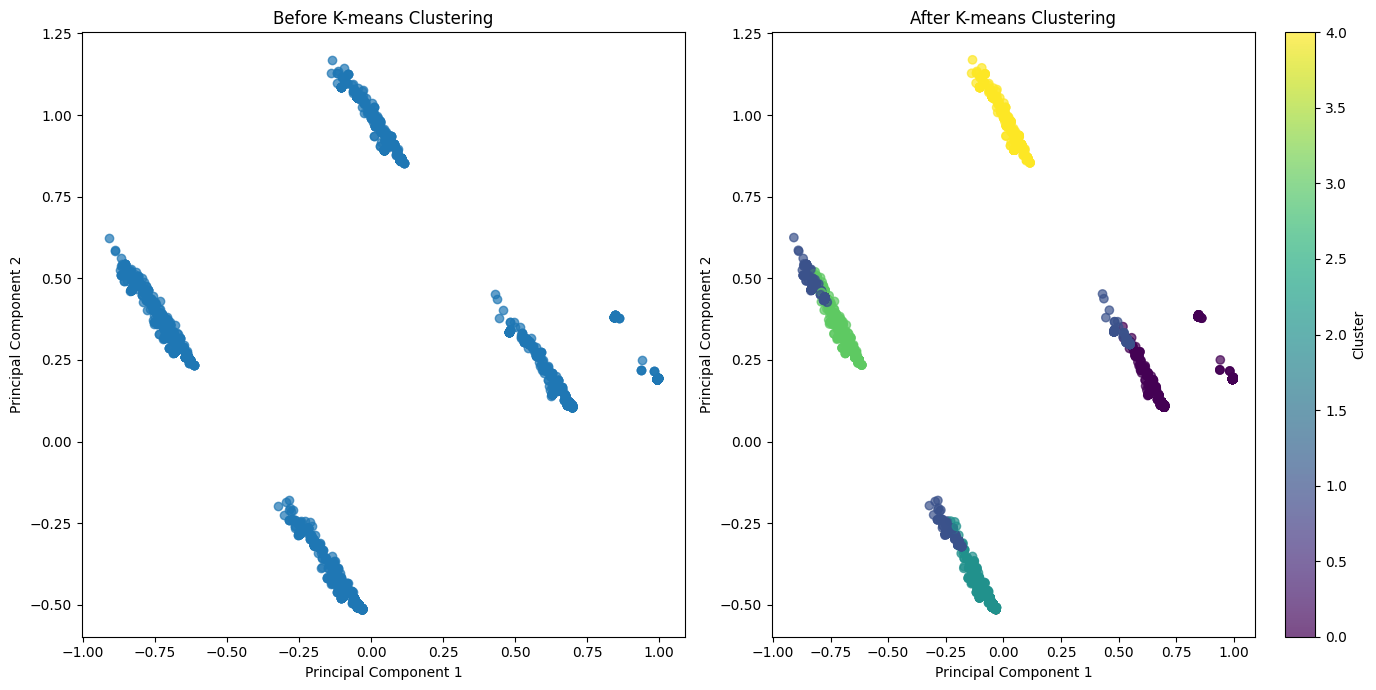

Cluster 0:
  Outdoor Seating: 0.00%
  Vegetarian Only: 1.81%
  Live Music: 1.05%
  Home Delivery: 0.00%
  Wifi: 2.09%
  Buffet: 1.53%
  Table Reservation Not Required: 1.73%
  Live Sports Screening: 0.97%
  Desserts and Bakes: 7.97%
  Mall Parking: 1.01%
  Valet Parking Available: 2.21%
  Kid Friendly: 0.48%
  Standing Tables: 2.58%
  Delivery Only: 39.53%
  LGBTQIA Friendly: 1.33%
  Table booking recommended: 2.98%
  Brunch: 0.52%

Cluster 1:
  Outdoor Seating: 34.53%
  Vegetarian Only: 100.00%
  Live Music: 0.20%
  Home Delivery: 77.85%
  Wifi: 1.83%
  Buffet: 1.33%
  Table Reservation Not Required: 7.65%
  Live Sports Screening: 0.69%
  Desserts and Bakes: 16.82%
  Mall Parking: 2.07%
  Valet Parking Available: 1.53%
  Kid Friendly: 1.68%
  Standing Tables: 1.97%
  Delivery Only: 0.00%
  LGBTQIA Friendly: 0.10%
  Table booking recommended: 3.21%
  Brunch: 0.64%

Cluster 2:
  Outdoor Seating: 0.00%
  Vegetarian Only: 0.00%
  Live Music: 1.01%
  Home Delivery: 100.00%
  Wifi: 1.75%
  

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# List of features for clustering (adjust according to your dataset)
features = ['Outdoor Seating', 'Vegetarian Only', 'Live Music', 'Home Delivery', 'Wifi',
            'Buffet', 'Table Reservation Not Required', 'Live Sports Screening',
            'Desserts and Bakes', 'Mall Parking', 'Valet Parking Available',
            'Kid Friendly', 'Standing Tables', 'Delivery Only', 'LGBTQIA Friendly',
            'Table booking recommended', 'Brunch']

# Select features for clustering
clustering_data = data[features]

# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(clustering_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot before K-means clustering
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.title('Before K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Apply K-means clustering
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(clustering_data)
data['Cluster'] = kmeans.labels_

# Plot after K-means clustering
plt.subplot(1, 2, 2)
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.title('After K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

# Analysis of Clusters
cluster_analysis = {f'Cluster {i}': {} for i in range(k)}
for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    for feature in features:
        mean_value = cluster_data[feature].mean() * 100  # Convert to percentage
        cluster_analysis[f'Cluster {cluster}'][feature] = mean_value

# Printing the analysis
for cluster, features in cluster_analysis.items():
    print(cluster + ':')
    for feature, value in features.items():
        print(f'  {feature}: {value:.2f}%')
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         Average Rating  Number of Restaurants
Cluster                                       
0              0.075456                   8601
1              1.000000                      1
2              0.651685                    267
3              1.000000                     12
4              0.846154                     39
                0       1-17     17-30     30-100   100-200    200-500  \
Cluster                                                                  
0        14.24253  32.845018  11.84746  21.985816  8.150215   8.045576   
1         0.00000   0.000000   0.00000   0.000000  0.000000   0.000000   
2         0.00000   0.000000   0.00000   1.123596  4.494382  11.610487   
3         0.00000   0.000000   0.00000   0.000000  0.000000   0.000000   
4         0.00000   0.000000   0.00000   0.000000  5.128205   0.000000   

          500-1000  1000-2000       >2500  Outdoor Seating  ...  \
Cluster                                                     ...   
0         2.581095

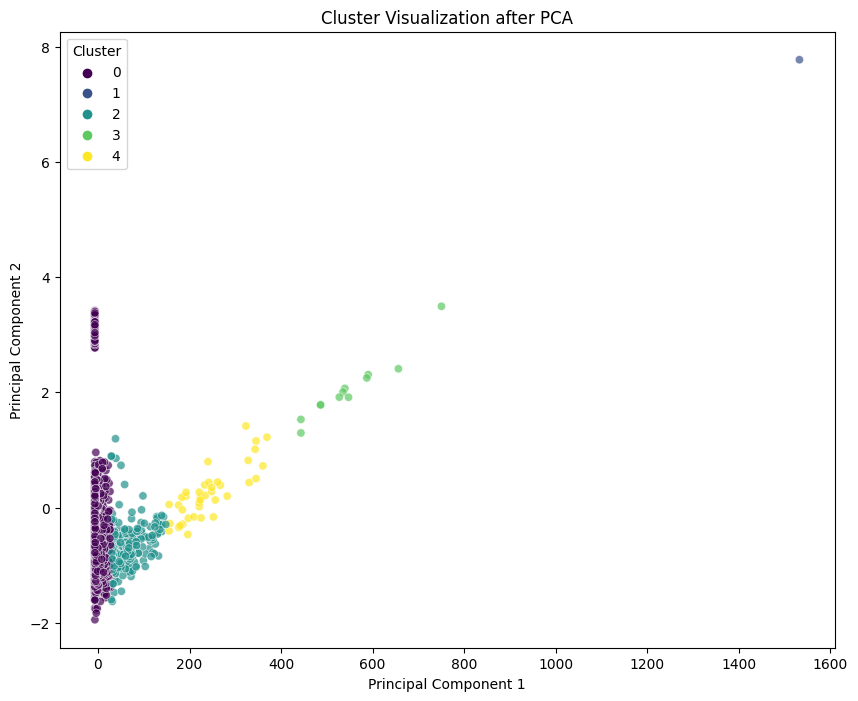

In [ ]:
# Select the one-hot encoded features for clustering
wine_and_beer_index = X.columns.get_loc("Wine and Beer")
feature_columns = X.columns[wine_and_beer_index:-1]  # Exclude the last column
clustering_data = X[feature_columns]

# Clean the 'Ratings_out_of_5' column
data_assco_one_hot['Rating_between4to5'] = pd.to_numeric(data_assco_one_hot['Rating_between4to5'], errors='coerce')

# Apply K-means clustering
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(clustering_data)
data_assco_one_hot['Cluster'] = kmeans.labels_

# Analyze average ratings and count of restaurants per cluster
cluster_analysis = data_assco_one_hot.groupby('Cluster')['Rating_between4to5'].agg(['mean', 'count'])
cluster_analysis.columns = ['Average Rating', 'Number of Restaurants']
print(cluster_analysis)

# Analyze the distribution of key features within each cluster
#key_features = ["0","1-17", "17-30", "30-100","100-200","200-500","500-1000","1000-2000",">2500"]
key_features = ["0","1-17", "17-30", "30-100","100-200","200-500","500-1000","1000-2000",">2500",'Outdoor Seating', 'Vegetarian Only', 'Live Music', 'Home Delivery', 'Wifi', 'Buffet', 'Table Reservation Not Required', 'Live Sports Screening', 'Desserts and Bakes', 'Mall Parking', 'Valet Parking Available', 'Kid Friendly', 'Standing Tables', 'Delivery Only', 'LGBTQIA Friendly', 'Table booking recommended', 'Brunch']
feature_analysis = (clustering_data[key_features]
                    .groupby(data_assco_one_hot['Cluster'])
                    .mean() * 100)  # Convert to percentage
print(feature_analysis)

# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(clustering_data)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Cluster Visualization after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: Rating_between3to4, Length: 100, dtype: int64

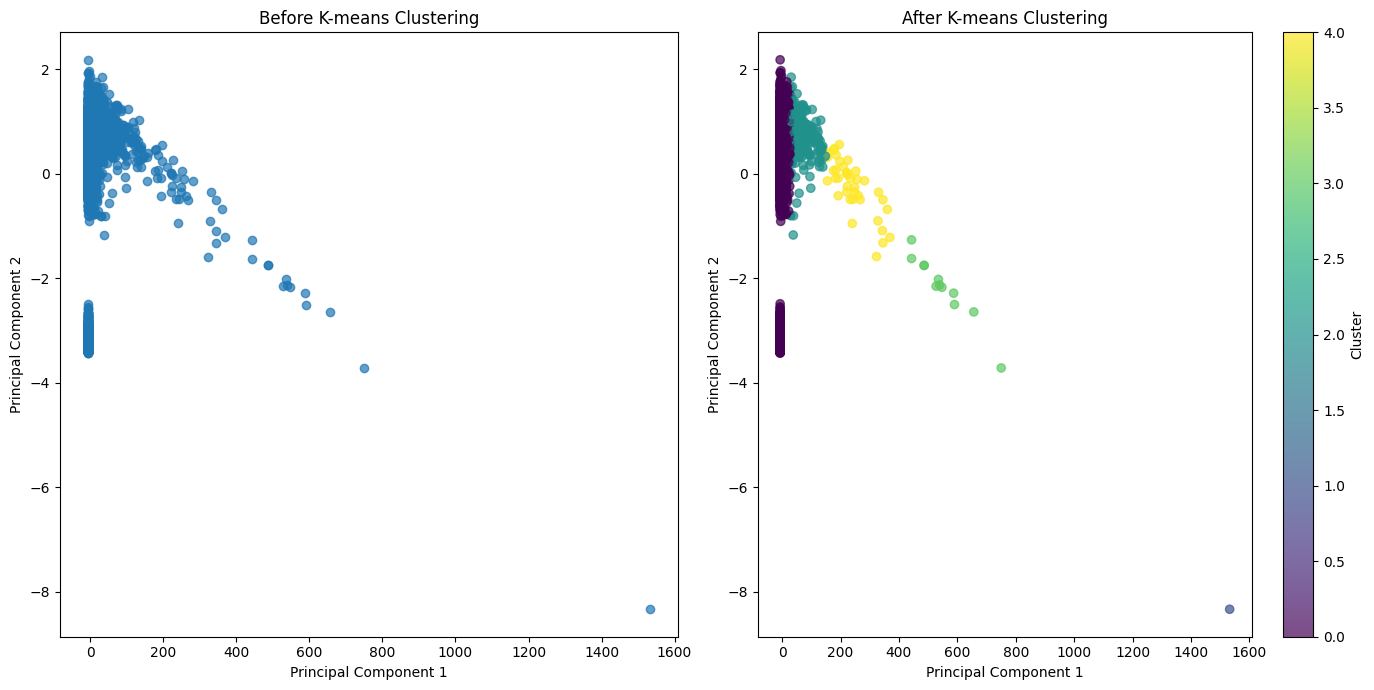

In [ ]:
# Apply Incremental PCA to reduce the data to two dimensions for visualization
ipca = IncrementalPCA(n_components=2, batch_size=500)
principal_components = ipca.fit_transform(clustering_data)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot before K-means clustering
plt.figure(figsize=(14, 7))

# Plotting the results of PCA without cluster labels
plt.subplot(1, 2, 1)
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.title('Before K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot after K-means clustering
plt.subplot(1, 2, 2)
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.title('After K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')

plt.tight_layout()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming 'data' is your DataFrame with the restaurant data and cluster labels

# List of all features to analyze
features = ['Outdoor Seating', 'Vegetarian Only', 'Live Music', 'Home Delivery', 'Wifi',
            'Buffet', 'Table Reservation Not Required', 'Live Sports Screening',
            'Desserts and Bakes', 'Mall Parking', 'Valet Parking Available',
            'Kid Friendly', 'Standing Tables', 'Delivery Only', 'LGBTQIA Friendly',
            'Table booking recommended', 'Brunch']

# Initialize a dictionary to store the analysis
cluster_analysis = {f'Cluster {i}': {} for i in range(5)}

# Calculate the mean for each feature in each cluster
for cluster in range(5):
    cluster_data = data_assco_one_hot[data_assco_one_hot['Cluster'] == cluster]
    for feature in features:
        mean_value = cluster_data[feature].mean() * 100  # Convert to percentage
        cluster_analysis[f'Cluster {cluster}'][feature] = mean_value

# Print the analysis
for cluster, features in cluster_analysis.items():
    print(cluster + ':')
    for feature, value in features.items():
        print(f'  {feature}: {value:.2f}%')
    print()

Cluster 0:
  Outdoor Seating: 34.38%
  Vegetarian Only: 20.21%
  Live Music: 2.12%
  Home Delivery: 70.71%
  Wifi: 3.81%
  Buffet: 1.98%
  Table Reservation Not Required: 5.92%
  Live Sports Screening: 2.41%
  Desserts and Bakes: 8.77%
  Mall Parking: 1.52%
  Valet Parking Available: 2.53%
  Kid Friendly: 1.55%
  Standing Tables: 1.34%
  Delivery Only: 7.94%
  LGBTQIA Friendly: 1.28%
  Table booking recommended: 5.03%
  Brunch: 0.77%

Cluster 1:
  Outdoor Seating: 100.00%
  Vegetarian Only: 0.00%
  Live Music: 0.00%
  Home Delivery: 0.00%
  Wifi: 0.00%
  Buffet: 100.00%
  Table Reservation Not Required: 0.00%
  Live Sports Screening: 0.00%
  Desserts and Bakes: 0.00%
  Mall Parking: 0.00%
  Valet Parking Available: 100.00%
  Kid Friendly: 0.00%
  Standing Tables: 0.00%
  Delivery Only: 0.00%
  LGBTQIA Friendly: 0.00%
  Table booking recommended: 100.00%
  Brunch: 0.00%

Cluster 2:
  Outdoor Seating: 61.05%
  Vegetarian Only: 16.85%
  Live Music: 20.97%
  Home Delivery: 76.78%
  Wifi: 1

In [ ]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.7, random_state=101)

log_reg = LogisticRegression()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
svc = SVC()
dtc= DecisionTreeClassifier()

models = {
    'Logistic Regression': log_reg,
    'KNN': knn,
    'Random Forest': rfc,
    'SVC': svc,
    'Decision Tree Classifier': dtc
}

def fit_and_score(models, X_train, y1_train, X_test, y1_test):
  """
    Fits and Evaluates machine Learning Models
    models: dictionary of machine learning models from SciKit learn
    X_train: set of training features (no labels)
    X_test: set of test features (no labels)
    y_train: training labels
    y_test: test labels
  """

  np.random.seed(101)

  model_accuracy = {}

  for model_name, model in models.items():
    model.fit(X_train, y1_train)

    model_accuracy[model_name] = model.score(X_test, y1_test)

  return model_accuracy



np.random.seed(42)
model_scores = fit_and_score(models, X_train, y1_train, X_test, y1_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8217488789237668,
 'KNN': 0.8118193465727098,
 'Random Forest': 0.8363228699551569,
 'SVC': 0.8238308776425368,
 'Decision Tree Classifier': 0.7581678411274824}

In [ ]:
y1_test

NameError: ignored

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'SVC'),
  Text(4, 0, 'Decision Tree Classifier')])

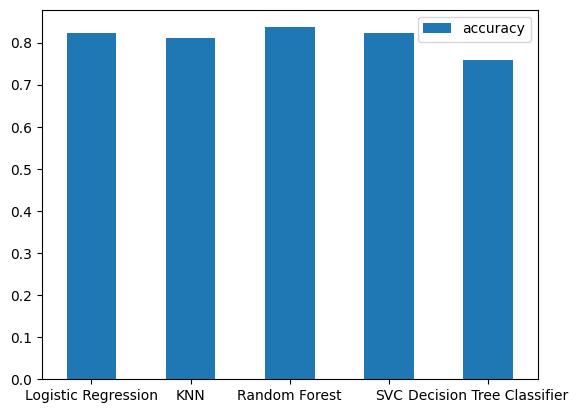

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

model_compare.T.plot.bar()

plt.xticks(rotation=0)

In [ ]:
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.7, random_state=101)

log_reg = LogisticRegression()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
svc = SVC()
dtc= DecisionTreeClassifier()

models = {
    'Logistic Regression': log_reg,
    'KNN': knn,
    'Random Forest': rfc,
    'SVC': svc,
    'Decision Tree Classifier': dtc
}

def fit_and_score(models, X_train, y2_train, X_test, y2_test):
  """
    Fits and Evaluates machine Learning Models
    models: dictionary of machine learning models from SciKit learn
    X_train: set of training features (no labels)
    X_test: set of test features (no labels)
    y_train: training labels
    y_test: test labels
  """

  np.random.seed(101)

  model_accuracy = {}

  for model_name, model in models.items():
    model.fit(X_train, y2_train)

    model_accuracy[model_name] = model.score(X_test, y2_test)

  return model_accuracy



np.random.seed(42)
model_scores2 = fit_and_score(models, X_train, y2_train, X_test, y2_test)
model_scores2

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.903747597693786,
 'KNN': 0.8970211402946829,
 'Random Forest': 0.9056694426649584,
 'SVC': 0.9069506726457399,
 'Decision Tree Classifier': 0.8396860986547086}

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'SVC'),
  Text(4, 0, 'Decision Tree Classifier')])

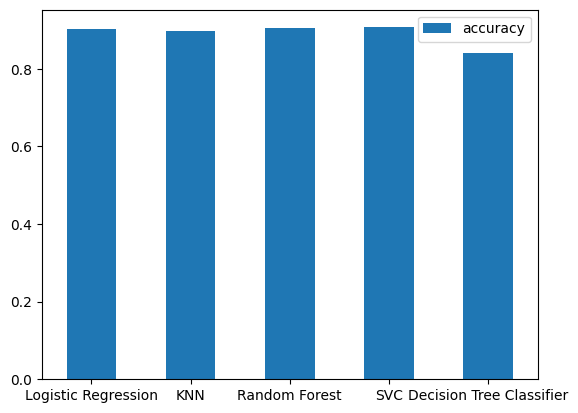

In [ ]:
model_compare = pd.DataFrame(model_scores2, index=['accuracy'])

model_compare.T.plot.bar()

plt.xticks(rotation=0)

In [ ]:
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.7, random_state=101)

log_reg = LogisticRegression()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
svc = SVC()
dtc= DecisionTreeClassifier()

models = {
    'Logistic Regression': log_reg,
    'KNN': knn,
    'Random Forest': rfc,
    'SVC': svc,
    'Decision Tree Classifier': dtc
}

def fit_and_score(models, X_train, y3_train, X_test, y3_test):
  """
    Fits and Evaluates machine Learning Models
    models: dictionary of machine learning models from SciKit learn
    X_train: set of training features (no labels)
    X_test: set of test features (no labels)
    y_train: training labels
    y_test: test labels
  """

  np.random.seed(101)

  model_accuracy = {}

  for model_name, model in models.items():
    model.fit(X_train,y3_train)

    model_accuracy[model_name] = model.score(X_test, y3_test)

  return model_accuracy



np.random.seed(42)
model_scores3 = fit_and_score(models, X_train, y3_train, X_test, y3_test)
model_scores3

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9255285073670724,
 'KNN': 0.9123959000640615,
 'Random Forest': 0.9263292761050609,
 'SVC': 0.9130365150544523,
 'Decision Tree Classifier': 0.903267136450993}

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'SVC'),
  Text(4, 0, 'Decision Tree Classifier')])

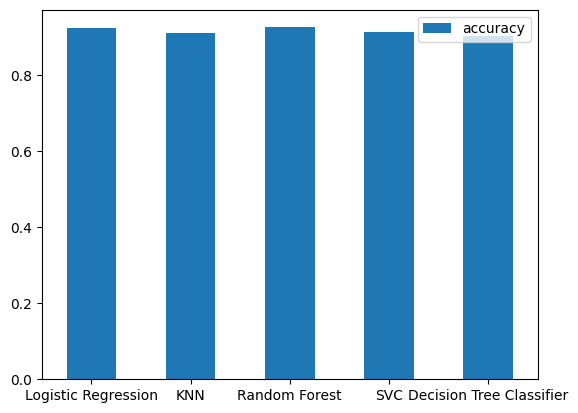

In [ ]:
model_compare = pd.DataFrame(model_scores3, index=['accuracy'])

model_compare.T.plot.bar(label='for rating 4-5')

plt.xticks(rotation=0)

In [ ]:
train_scores = []
test_scores = []

neighbors = range(1, 21)

for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y1_train)
  train_scores.append(knn.score(X_train, y1_train))
  test_scores.append(knn.score(X_test, y1_test))

In [ ]:
train_scores

[0.999626307922272,
 0.8807922272047832,
 0.875560538116592,
 0.8613602391629297,
 0.8542600896860987,
 0.8467862481315396,
 0.8452914798206278,
 0.8419282511210763,
 0.8385650224215246,
 0.8337070254110612,
 0.8307174887892377,
 0.8299701046337817,
 0.827727952167414,
 0.8288490284005979,
 0.8269805680119582,
 0.8295964125560538,
 0.8258594917787743,
 0.8258594917787743,
 0.8254857997010463,
 0.8254857997010463]

In [ ]:
test_scores

[0.7551249199231262,
 0.7038757206918642,
 0.7986867392696989,
 0.7769058295964125,
 0.8118193465727098,
 0.8009288917360666,
 0.8177450352338245,
 0.8100576553491352,
 0.8215887251761691,
 0.8215887251761691,
 0.8228699551569507,
 0.8235105701473414,
 0.8249519538757207,
 0.824791800128123,
 0.8228699551569507,
 0.8233504163997437,
 0.8228699551569507,
 0.822709801409353,
 0.8225496476617553,
 0.824791800128123]

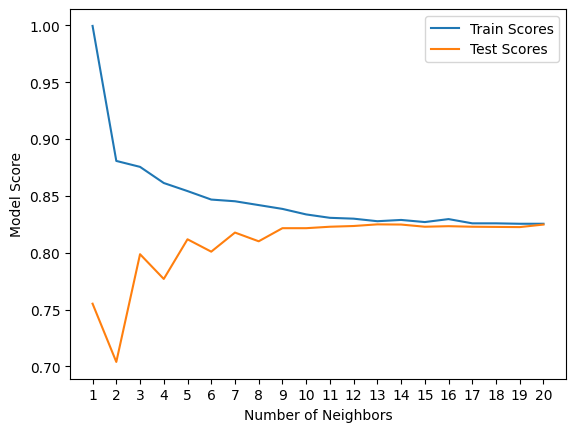

In [ ]:
# Plot K vs Errors
plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.xticks(np.arange(1, 21, 1))
plt.legend()

In [ ]:
# Creating Hyperparameter grid for Logistic Regression
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2']
}

# Setting Random Seed
np.random.seed(101)

# Using Randomized Search Cross Validation to check for best parameters
rcv_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

rcv_log_reg.fit(X_train, y1_train)

rcv_log_reg.score(X_test, y1_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8295964125560538

In [ ]:
rcv_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.23357214690901212}

In [ ]:
# Setting Random Seed
np.random.seed(101)

# Using Randomized Search Cross Validation to check for best parameters
gridcv_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)

gridcv_log_reg.fit(X_train, y1_train)

gridcv_log_reg.score(X_test, y1_test)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


0.8302370275464446

In [ ]:
gridcv_log_reg.best_params_

{'C': 0.08858667904100823, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
# Creating hyperparamer grid for Random Forest Classification
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "criterion": ['gini', 'entropy']
}

# Setting Random Seed
np.random.seed(101)

# Using Randomized Search Cross Validation to check for best parameters
rcv_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)

rcv_rf.fit(X_train, y1_train)

rcv_rf.score(X_test, y1_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8294362588084562

In [ ]:
# Creating hyperparamer grid for Support Vector Classification
svc_grid = {
    'C': [0.01, 0.1, 1],
    'kernel': ['rbf']
}

# Setting Random Seed
np.random.seed(101)

# Using Randomized Search Cross Validation to check for best parameters
gridcv_svc = GridSearchCV(SVC(), param_grid=svc_grid, cv=5, verbose=True)

gridcv_svc.fit(X_train, y1_train)

gridcv_svc.score(X_test, y1_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


0.8238308776425368

In [ ]:
gridcv_svc.best_params_

{'C': 1, 'kernel': 'rbf'}

In [ ]:
y_pred_log_reg = gridcv_log_reg.predict(X_test)
y_pred_log_reg

array([1, 1, 1, ..., 1, 0, 1])

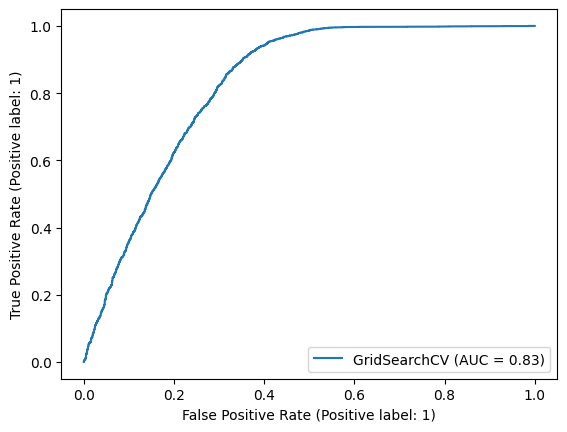

In [ ]:
# Plotting the ROC AUC for Logistic Regression Clasifier
RocCurveDisplay.from_estimator(estimator=gridcv_log_reg, X=X_test, y=y1_test)

In [ ]:
# Confusion Matrix for Logistic Regression Clasifier
conf_matrix_log_reg = confusion_matrix(y1_test, y_pred_log_reg)
conf_matrix_log_reg

array([[1105,  942],
       [ 118, 4079]])

<Axes: >

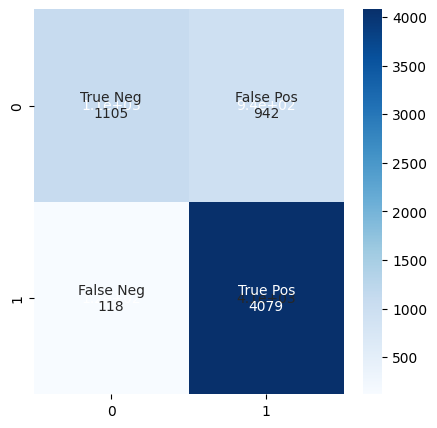

In [ ]:
# Visualising Confusion Matrix for Logistic Regression Clasifier
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(conf_matrix_log_reg, annot=True, cbar=False)

plt.ylabel("True Label")
plt.xlabel("Predicted Label")

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix_log_reg.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_log_reg, annot=labels, fmt='', cmap='Blues')

In [ ]:
# Classification Report For Logistic Regression Clasifier
print(classification_report(y1_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.90      0.54      0.68      2047
           1       0.81      0.97      0.89      4197

    accuracy                           0.83      6244
   macro avg       0.86      0.76      0.78      6244
weighted avg       0.84      0.83      0.82      6244



In [ ]:
y_pred_rfc = rfc.predict(X_test)
y_pred_rfc

array([0, 0, 0, ..., 0, 0, 0])

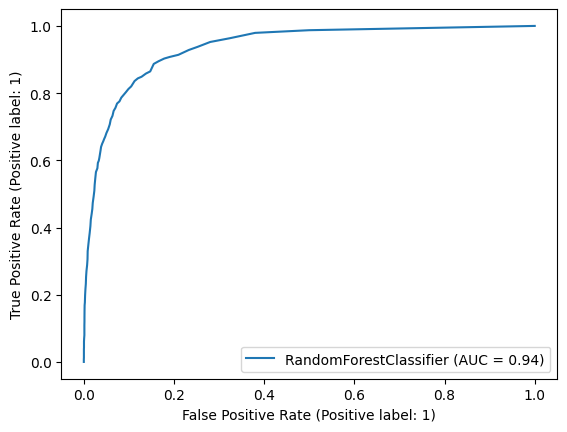

In [ ]:
# Plotting the ROC AUC for default Random Forest Clasifier
RocCurveDisplay.from_estimator(estimator=rfc, X=X_test, y=y3_test)

In [ ]:
# Confusion Matrix for Default Random Forest
conf_matrix_rfc = confusion_matrix(y3_test, y_pred_rfc)
conf_matrix_rfc

array([[5543,   73],
       [ 387,  241]])

<Axes: >

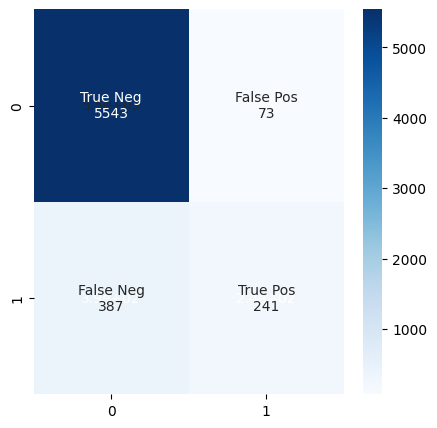

In [ ]:
# Visualising Confusion Matrix for Random Forest
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(conf_matrix_rfc, annot=True, cbar=False)

plt.ylabel("True Label")
plt.xlabel("Predicted Label")

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix_rfc.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_rfc, annot=labels, fmt='', cmap='Blues')

In [ ]:
# Classification Report For Random Forest Classifier
print(classification_report(y3_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5616
           1       0.77      0.38      0.51       628

    accuracy                           0.93      6244
   macro avg       0.85      0.69      0.74      6244
weighted avg       0.92      0.93      0.92      6244

